In [ ]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
data=pd.read_csv("kidney_disease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cells', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
data = data.drop('id', axis=1)

In [ ]:
data.columns=['age', 'blood_pressure', 'specific_gravity', 'albumin',
'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetesmellitus', 'coronary artery disease', 'appetite', 'pedal_edema', 'anemia','class'] # manually giving the name of the columns
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary artery disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 400 non-null    int64  
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [ ]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                   False
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary artery disease    False
appetite                   False
pedal_edema                False
anemia                     False
class                      False
dtype: bool

In [ ]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(), inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(), inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(), inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True)
#data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)
data['packed_cell_volume'].apply(lambda x: isinstance(x, (int, float))).unique()
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
#data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(), inplace=True)
data['red_blood_cell_count'].apply(lambda x: isinstance(x, (int, float))).unique()
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(), inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)
data['sodium'].fillna(data['sodium'].mean(), inplace=True)
#data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(), inplace=True)
data['white_blood_cell_count'].apply(lambda x: isinstance(x, (int, float))).unique()
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(), inplace=True)

In [ ]:
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0], inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0], inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0], inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0], inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0], inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0], inplace=True)
data['coronary artery disease'].fillna(data['coronary artery disease'].mode()[0], inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0], inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0], inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0], inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0], inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0], inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0], inplace=True)

In [ ]:
catcols=set(data.dtypes[data.dtypes=='0'].index.values)
print(catcols)

set()


In [ ]:
for i in catcols:
 print("Continous Columns :",i)
 print(c(data[i]))
 print('*'*120+'\n')

In [ ]:
if 'red_blood_cell_count' in catcols:
    catcols.remove('red_blood_cell_count')
if 'packed_cell_volume' in catcols:
    catcols.remove('packed_cell_volume')
if 'white_blood_cell_count' in catcols:
    catcols.remove('white_blood_cell_count')

In [ ]:
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary artery disease','diabetesmellitus','hypertension','pus_cell', 'pus_cell_clumps','red_blood_cells']


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Looping through all the categorical columns
for i in catcols:
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder() # creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LEi.fit_transform(data[i]) # transforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print("*"*100)

LABEL ENCODING OF: anemia
Counter({0: 339, 1: 60, 2: 1})
Counter({0: 339, 1: 60, 2: 1})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({0: 323, 1: 76, 2: 1})
Counter({0: 323, 1: 76, 2: 1})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({0: 317, 1: 82, 2: 1})
Counter({0: 317, 1: 82, 2: 1})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({0: 374, 1: 22, 2: 4})
Counter({0: 374, 1: 22, 2: 4})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({0: 248, 2: 150, 1: 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary artery disease
Co

In [ ]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)# #contcols=pd.DataFrame(data, columns=contcols)
print(contcols)

{'blood_urea', 'packed_cell_volume', 'red_blood_cell_count', 'pedal_edema', 'albumin', 'hemoglobin', 'appetite', 'sugar', 'sodium', 'pus_cell_clumps', 'blood glucose random', 'coronary artery disease', 'class', 'blood_pressure', 'diabetesmellitus', 'hypertension', 'pus_cell', 'age', 'potassium', 'anemia', 'serum_creatinine', 'specific_gravity', 'bacteria', 'white_blood_cell_count', 'red_blood_cells'}


In [ ]:
for i in contcols:
 print("Continous Columns :",i)
 print(c(data[i]))
 print('*'*120+'\n')
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

Continous Columns : blood_urea
Counter({57.425721784776904: 19, 46.0: 15, 25.0: 13, 19.0: 11, 40.0: 10, 18.0: 9, 50.0: 9, 15.0: 9, 48.0: 9, 26.0: 8, 27.0: 8, 32.0: 8, 49.0: 8, 36.0: 7, 28.0: 7, 20.0: 7, 17.0: 7, 38.0: 7, 16.0: 7, 30.0: 7, 44.0: 7, 31.0: 6, 45.0: 6, 39.0: 6, 29.0: 6, 24.0: 6, 37.0: 6, 22.0: 6, 23.0: 6, 53.0: 5, 55.0: 5, 33.0: 5, 66.0: 5, 35.0: 5, 42.0: 5, 47.0: 4, 51.0: 4, 34.0: 4, 68.0: 4, 41.0: 4, 60.0: 3, 107.0: 3, 80.0: 3, 96.0: 3, 52.0: 3, 106.0: 3, 125.0: 3, 56.0: 2, 54.0: 2, 72.0: 2, 86.0: 2, 90.0: 2, 87.0: 2, 155.0: 2, 153.0: 2, 77.0: 2, 89.0: 2, 111.0: 2, 73.0: 2, 98.0: 2, 82.0: 2, 132.0: 2, 58.0: 2, 10.0: 2, 162.0: 1, 148.0: 1, 180.0: 1, 163.0: 1, 75.0: 1, 65.0: 1, 103.0: 1, 70.0: 1, 202.0: 1, 114.0: 1, 164.0: 1, 142.0: 1, 391.0: 1, 92.0: 1, 139.0: 1, 85.0: 1, 186.0: 1, 217.0: 1, 88.0: 1, 118.0: 1, 50.1: 1, 71.0: 1, 21.0: 1, 219.0: 1, 166.0: 1, 208.0: 1, 176.0: 1, 145.0: 1, 165.0: 1, 322.0: 1, 235.0: 1, 76.0: 1, 113.0: 1, 1.5: 1, 146.0: 1, 133.0: 1, 137.0: 1, 

In [ ]:
contcols.add('red_blood_cell_count') 
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'blood_urea', 'packed_cell_volume', 'red_blood_cell_count', 'pedal_edema', 'hemoglobin', 'appetite', 'sodium', 'pus_cell_clumps', 'blood glucose random', 'coronary artery disease', 'class', 'blood_pressure', 'diabetesmellitus', 'hypertension', 'pus_cell', 'age', 'potassium', 'anemia', 'serum_creatinine', 'bacteria', 'white_blood_cell_count', 'red_blood_cells'}


In [ ]:
contcols.add('specific_gravity')
contcols.add('albumin')
contcols.add('sugar')
print(catcols)

['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary artery disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']


In [ ]:
data['coronary artery disease'] = data['coronary artery disease'].replace('\tno', 'no')
c(data['coronary artery disease'])

Counter({1: 362, 2: 34, 0: 2, 3: 2})

In [ ]:
data['diabetesmellitus'] = data['diabetesmellitus'].replace(to_replace={"\\tno": "no", "\tyes": "yes", " yes": "yes"})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [ ]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood glucose random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary artery disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.075000,148.036517,...,38.884498,8406.122449,4.707435,0.367500,3.300000,1.090000,0.210000,0.195000,0.15500,0.755000
std,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.299331,74.782634,...,8.151081,2523.219976,0.840314,0.482728,0.579517,0.319618,0.413918,0.402965,0.36921,0.968152
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,4.000000,1.000000,0.000000,0.000000,0.00000,2.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,2.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,4.000000,3.000000,2.000000,2.000000,2.00000,2.000000


<ipython-input-61-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

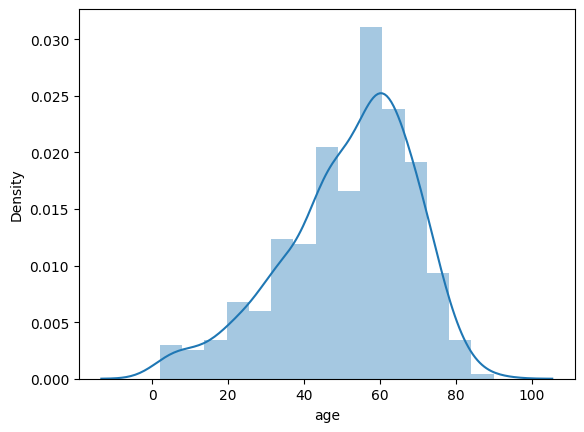

In [ ]:
sns.distplot(data.age)

Text(0.5, 1.0, 'age VS blood Scatter Plot')

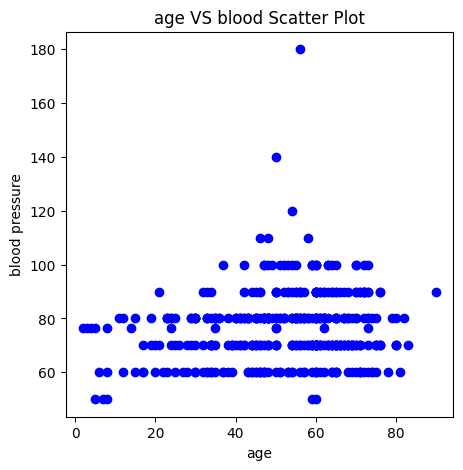

In [ ]:
import matplotlib.pyplot as plt # import the matplotlib libaray
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y-axis
plt.title("age VS blood Scatter Plot") #set a title for the xesa

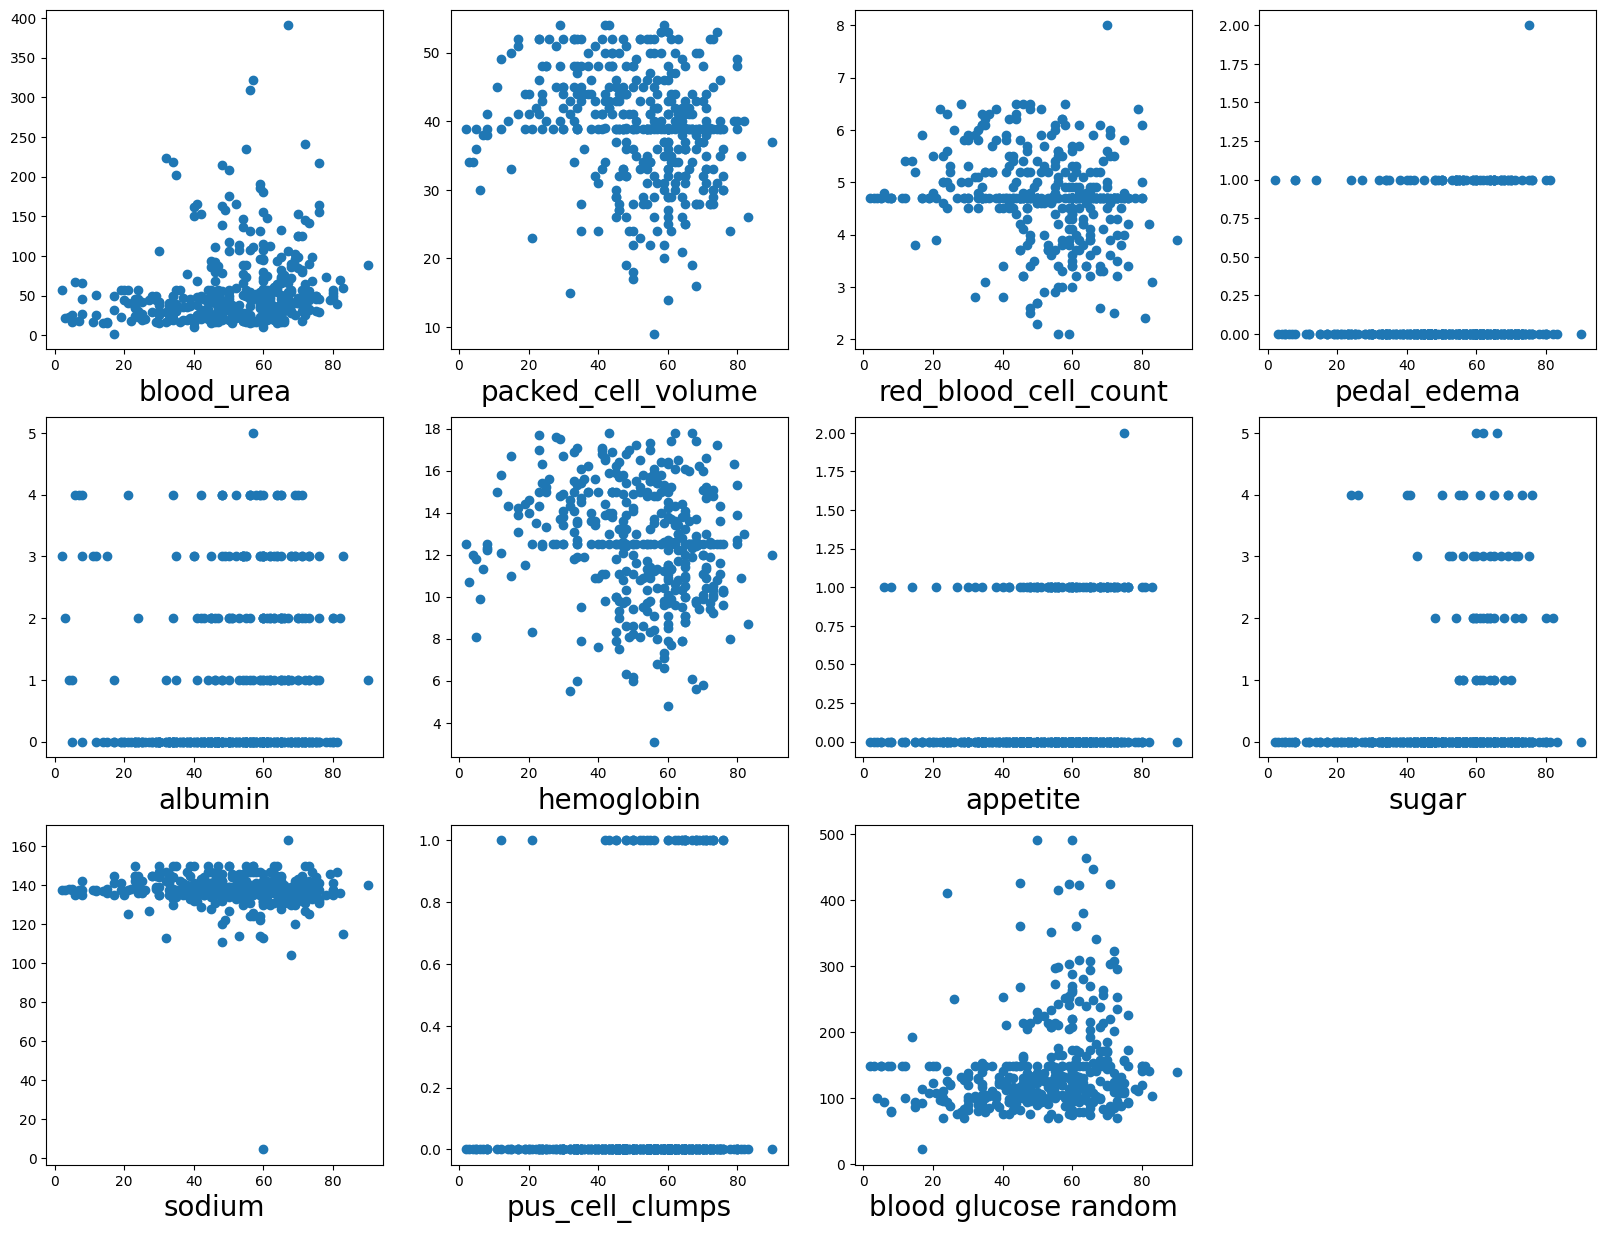

In [ ]:
plt.figure(figsize=(20,15),facecolor="white")
plotnumber = 1
for column in contcols: 
  if plotnumber<=11 : 
     ax = plt.subplot(3,4,plotnumber) 
     plt.scatter(data['age'], data[column]) 
     plt.xlabel(column, fontsize=20)
  plotnumber+=1
plt.show()

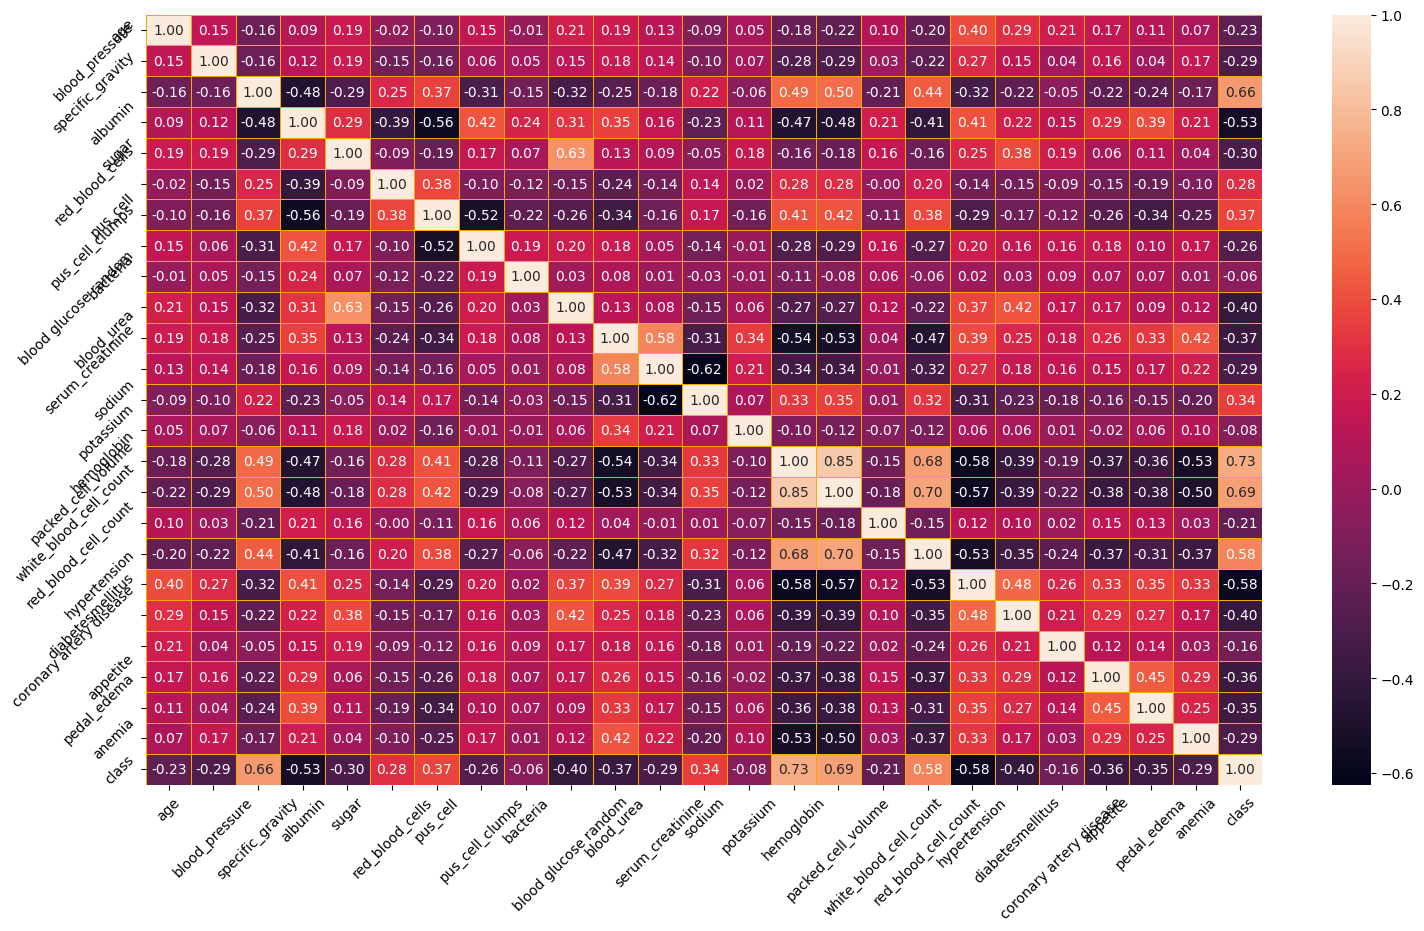

In [ ]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", ax=ax, linewidths=0.5, linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

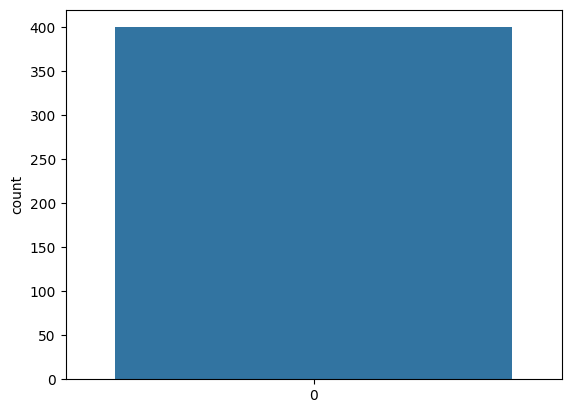

In [ ]:
sns.countplot(data['class'])

In [ ]:
import pandas as pd

In [ ]:
# assume that 'data' is a pandas DataFrame containing your data
print(data.columns)

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary artery disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')


In [ ]:
selcols=['red_blood_cells', 'pus_cell', 'blood glucose random', 'blood_urea', 'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary artery disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))

In [ ]:
classification.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classification.fit(x_train, y_train, batch_size=10, validation_split=0.2, epochs=100)


Epoch 1/100
26/26 [==============================] - 3s 19ms/step - loss: 1.3014 - accuracy: 0.3477 - val_loss: 0.4474 - val_accuracy: 0.3125
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6368 - accuracy: 0.2930 - val_loss: 0.2600 - val_accuracy: 0.2656
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.3203 - val_loss: 0.2604 - val_accuracy: 0.2656
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4300 - accuracy: 0.3125 - val_loss: 0.1823 - val_accuracy: 0.2500
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4794 - accuracy: 0.2695 - val_loss: 0.1630 - val_accuracy: 0.2500
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4122 - accuracy: 0.2422 - val_loss: 1.1031 - val_accuracy: 0.5938
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 0.7555 - accuracy: 0.3594 - val_loss: 0.1845 - val_accuracy: 0.2188
Epoch 8/100


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [ ]:
rfc.fit(x_train,y_train)

<ipython-input-76-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_predict = rfc.predict(x_test)
y_predict_train = rfc.predict(x_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4, splitter='best', criterion='entropy')
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict= dtc.predict(x_test)
y_predict

array([2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2])

In [ ]:
y_predict_train = dtc.predict(x_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression() 
lgr.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
y_predict = lgr.predict(x_test)

In [ ]:
y_pred = lgr.predict([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
print(y_pred)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = dtc.predict([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
print(y_pred)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = rfc.predict([[1, 1, 121.000000, 36.0, 0, 0, 1, 0]])
print(y_pred)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
classification.save("ckd.h5")

In [ ]:
y_pred = classification.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [ ]:
y_pred


array([[1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [ ]:
y_pred = (y_pred > 0.5)
y_pred


array([[ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [ ]:
def predict_exit(sample_value):
    # Convert list to numpy array 
    sample_value = np.array(sample_value)
    
    # Reshape because sample_value contains only 1 record 
    sample_value = sample_value.reshape(1, -1)
    
    # Feature Scaling
    sample_value = sc.transform(sample_value)
    
    return classifier.predict(sample_value)

In [ ]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]]) 
if test==1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD.')

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import pandas as pd


1/1 [==============================] - 0s 94ms/step
Prediction: High chance of CKD!


In [ ]:
dfs = []
models = [('LogReg', LogisticRegression()), ('RF', RandomForestClassifier()), ('DecisionTree', DecisionTreeClassifier())]

In [ ]:
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', 'CKD']

In [ ]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test, y_pred, labels=clf.classes_, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent 

LogReg
              precision    recall  f1-score   support

      NO CKD       0.98      0.85      0.91        47
         CKD       0.00      0.00      0.00         0

   micro avg       0.90      0.90      0.90        80
   macro avg       0.60      0.61      0.60        80
weighted avg       0.91      0.90      0.90        80



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last)

RF
              precision    recall  f1-score   support

      NO CKD       1.00      0.94      0.97        47
         CKD       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96        80
   macro avg       0.64      0.65      0.64        80
weighted avg       0.97      0.96      0.96        80

DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.90      0.94      0.92        47
         CKD       0.00      0.00      0.00         0

   micro avg       0.90      0.90      0.90        80
   macro avg       0.60      0.59      0.60        80
weighted avg       0.90      0.90      0.90        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

In [ ]:
final = pd.concat(dfs, ignore_index=True)


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_predict)
cm


array([[40,  7],
       [ 1, 32]])

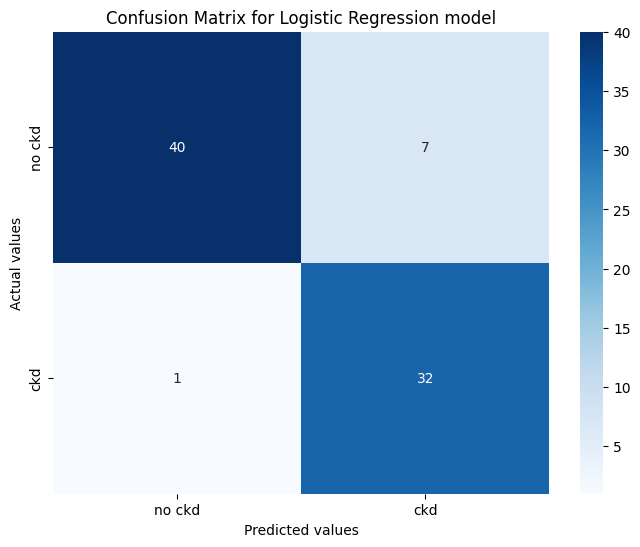

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model') 
plt.show()


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[40,  7],
       [ 1, 32]])

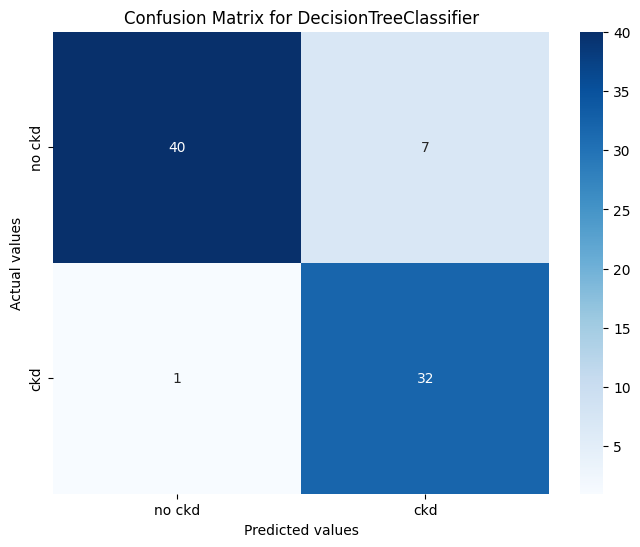

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[44  3]
 [ 5 28]]


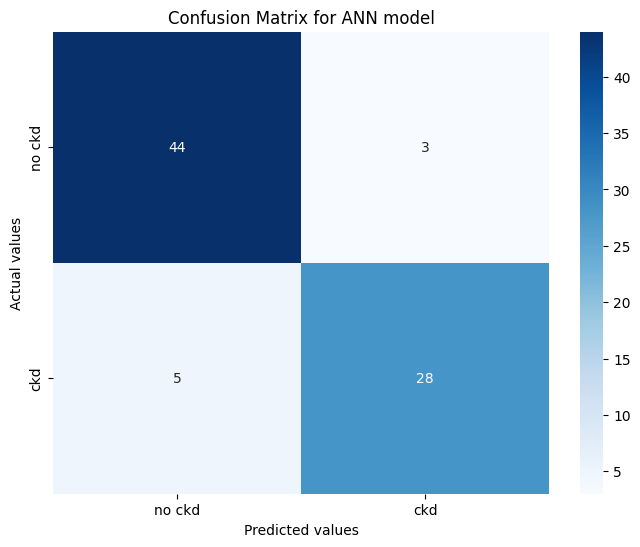

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE_METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get_df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')


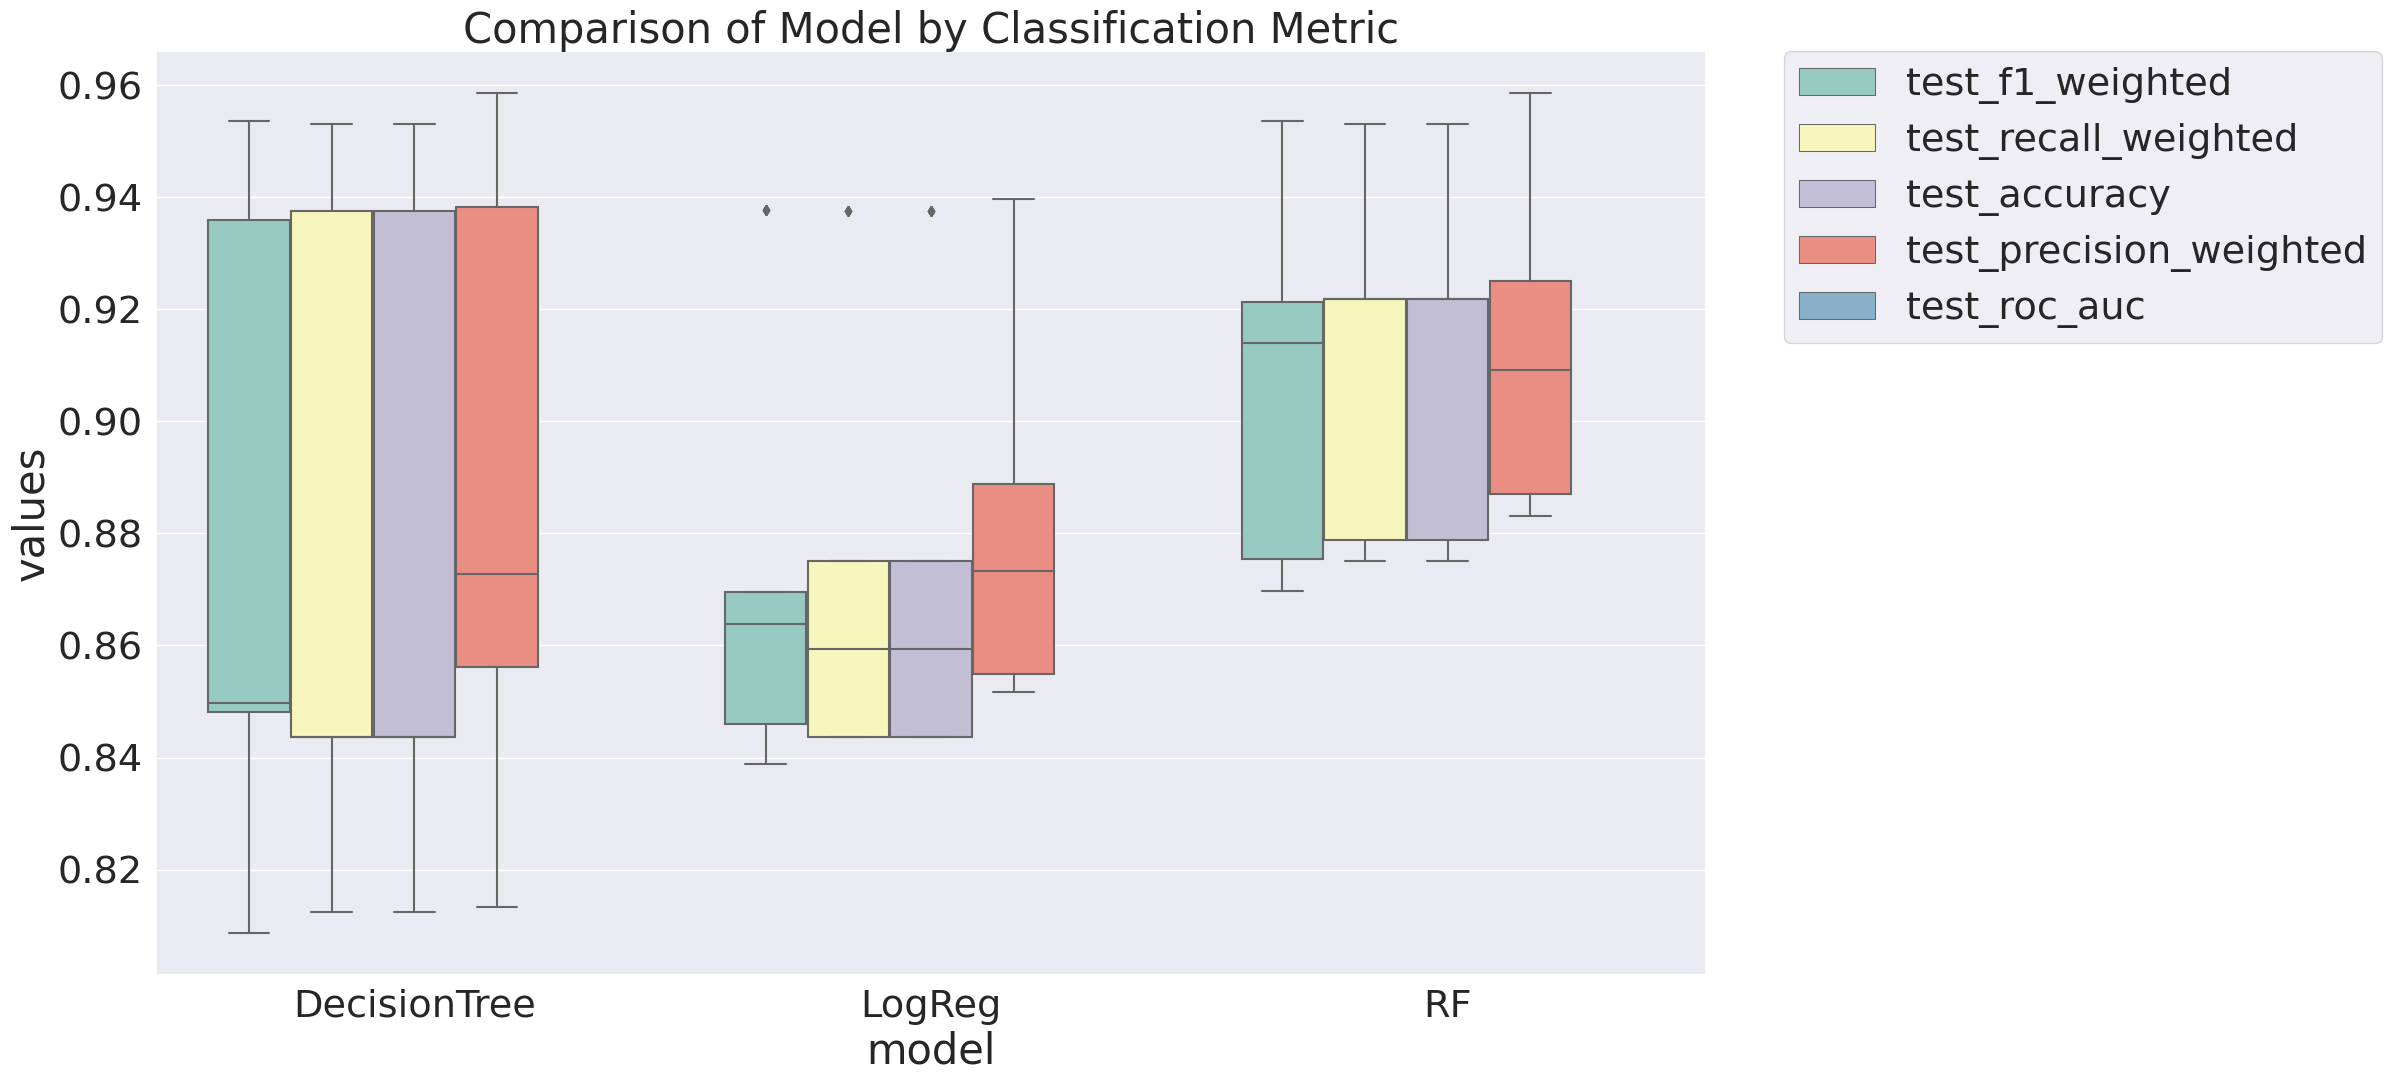

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend (bbox_to_anchor= (1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)


In [ ]:
pickle.dump(lgr, open('CKD.pkl','wb'))